## Analyze trials

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from concise.hyopt import CompileFN, CMongoTrials, test_fn
import numpy as np
import pandas as ps
from keras.models import load_model
import sklearn.metrics as skm
import concise.eval_metrics as cem
import data
import model
from helper import *

DB_NAME = "Concise__Splice_branchpoints"
exp_name = "model1"


Using TensorFlow backend.


In [2]:
trials = CMongoTrials(DB_NAME, exp_name, kill_timeout=30 * 60)

In [6]:
df = trials.as_df().sort_values("eval.auprc", ascending=False)
del df["param.model.pos_effect.merge_type"] #mis-specified
df

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.hidden_fc.dropout_rate,param.model.pos_effect.merge.hidden_fc.n_hidden,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,param.model.use_weightnorm,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
718,756,-0.6129,ok,0.9588,0.9227,0.6129,0.5236,0.2214,0.1230,0.7786,0.3985,0.9931,data,auprc,auprc,model,20,6.3078,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0040,None,3.3684e-11,3.8949e-07,NaN,0.0,20.0,concatenate,20,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,48.0837,127.9251,79.8414,2017-04-30 02:42:42.4...,2017-04-30 02:40:34.5...
606,644,-0.6124,ok,0.9592,0.9195,0.6124,0.5558,0.2593,0.1235,0.7407,0.4491,0.9904,data,auprc,auprc,model,20,7.0875,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0068,None,4.2315e-12,4.4642e-10,NaN,0.0,20.0,concatenate,20,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.6662,128.2978,80.6316,2017-04-30 02:30:06.0...,2017-04-30 02:27:57.7...
783,821,-0.6120,ok,0.9589,0.9169,0.6120,0.5213,0.2142,0.1243,0.7858,0.3937,0.9935,data,auprc,auprc,model,10,3.3912,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0067,None,1.6794e-12,4.8021e-10,NaN,0.0,20.0,concatenate,10,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,55.5565,229.1150,173.5585,2017-04-30 02:53:18.8...,2017-04-30 02:49:29.7...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,45,-0.1336,ok,0.9427,0.7627,0.1336,NaN,NaN,0.1946,NaN,0.0000,1.0000,data,auprc,auprc,model,10,3.4204,True,128,val_loss,150,2,1,NaN,NaN,NaN,0.0002,relu,2.4476e-09,1.7681e-12,NaN,NaN,NaN,add,10,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,39.5799,284.4190,244.8391,2017-04-30 01:13:26.8...,2017-04-30 01:08:42.4...
721,759,-0.0286,ok,0.9427,0.5000,0.0286,NaN,NaN,0.2195,NaN,0.0000,1.0000,data,auprc,auprc,model,20,6.0460,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0067,relu,1.3762e-12,7.3917e-07,NaN,NaN,NaN,multiply,20,False,True,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.9346,94.5748,46.6402,2017-04-30 02:42:27.4...,2017-04-30 02:40:52.8...
4,9,-0.0286,ok,0.9427,0.5000,0.0286,NaN,NaN,0.2195,NaN,0.0000,1.0000,data,auprc,auprc,model,10,2.4885,True,128,val_loss,150,2,1,NaN,NaN,NaN,0.0052,relu,1.6762e-12,2.1675e-09,NaN,NaN,NaN,multiply,10,True,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,58.8188,108.9289,50.1102,2017-04-30 01:09:55.7...,2017-04-30 01:08:06.7...


In [11]:
n_hid = np.array(df["param.model.pos_effect.merge.hidden_fc.n_hidden"])
n_hid

array([ 20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  10.,  20.,  20.,  10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  10.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,

In [13]:
np.array(df["param.model.pos_effect.merge.type"])[np.isnan(n_hid)]

array(['concatenate', 'concatenate', 'add', 'add', 'add', 'add', 'add', 'multiply', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'add', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'multiply', 'concatenate', 'multiply',
       'multiply', 'multiply', 'multiply', 'multiply', 'add', 'multiply', 'multiply', 'multiply',
       'add', 'multiply', 'multiply', 'concatenate', 'concatenate', 'multiply', 'add', 'multiply',
       'add', 'add', 'add', 'concatenate', 'add', 'add', 'concatenate', 'multiply', 'add', 'add',
       'concatenate', 'add', 'add', 'multiply', 'add', 'multiply', 'concatenate', 'add',
       'concatenate', 'concatenate', 'add', 'concatenate', 'concatenate', 'add', 'add', 'add',
       'concatenate', 'add', 'add', 'concatenate', 'add', 'add', 'add', 'concatenate',
       'concatenate', 'add', 'add', 'add', 'add', 'add'

In [16]:
df[np.isnan(df["param.model.pos_effect.merge.hidden_fc.n_hidden"])]

,tid,loss,status,eval.accuracy,eval.auc,eval.auprc,eval.f1,eval.fdr,eval.loss,eval.precision,eval.sensitivity,eval.specificity,name.data,name.loss_metric,name.loss_metric_mode,name.model,param.data.n_bases,param.data.pos_class_weight,param.data.truncate,param.fit.batch_size,param.fit.early_stop_monitor,param.fit.epochs,param.fit.patience,param.model.filters,param.model.init_motifs,param.model.init_motifs.stddev,param.model.init_motifs.use_pssm,param.model.lr,param.model.nonlinearity,param.model.pos_effect.l2,param.model.pos_effect.l2_smooth,param.model.pos_effect.merge.hidden_fc,param.model.pos_effect.merge.hidden_fc.dropout_rate,param.model.pos_effect.merge.hidden_fc.n_hidden,param.model.pos_effect.merge.type,param.model.pos_effect.n_bases,param.model.pos_effect.use_bias,param.model.use_weightnorm,path.model,path.results,time.duration.dataload,time.duration.total,time.duration.training,time.end,time.start
479,517,-0.5956,ok,0.9573,0.9163,0.5956,0.5424,0.2944,0.1260,0.7056,0.4449,0.9887,data,auprc,auprc,model,20,9.1710,False,128,val_loss,150,2,1,NaN,0.1,True,0.0034,relu,1.0716e-08,1.3726e-07,NaN,NaN,NaN,concatenate,20,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.4688,120.6594,73.1906,2017-04-30 02:16:07.0...,2017-04-30 02:14:06.3...
54,92,-0.5949,ok,0.9574,0.9161,0.5949,0.5236,0.2692,0.1261,0.7308,0.4123,0.9907,data,auprc,auprc,model,20,9.7791,False,128,val_loss,150,2,1,NaN,0.1,True,0.0010,relu,2.7317e-07,4.7137e-10,NaN,NaN,NaN,concatenate,20,True,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,86.6339,367.5151,280.8812,2017-04-30 01:21:38.6...,2017-04-30 01:15:31.1...
197,235,-0.5946,ok,0.9571,0.9155,0.5946,0.5472,0.3044,0.1264,0.6956,0.4557,0.9878,data,auprc,auprc,model,20,6.8995,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0006,relu,3.8046e-08,2.7554e-10,NaN,NaN,NaN,add,20,False,True,/s/project/deepcis/hy...,/s/project/deepcis/hy...,48.5484,181.8019,133.2535,2017-04-30 01:41:14.8...,2017-04-30 01:38:13.0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,45,-0.1336,ok,0.9427,0.7627,0.1336,NaN,NaN,0.1946,NaN,0.0000,1.0000,data,auprc,auprc,model,10,3.4204,True,128,val_loss,150,2,1,NaN,NaN,NaN,0.0002,relu,2.4476e-09,1.7681e-12,NaN,NaN,NaN,add,10,False,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,39.5799,284.4190,244.8391,2017-04-30 01:13:26.8...,2017-04-30 01:08:42.4...
721,759,-0.0286,ok,0.9427,0.5000,0.0286,NaN,NaN,0.2195,NaN,0.0000,1.0000,data,auprc,auprc,model,20,6.0460,False,128,val_loss,150,2,1,NaN,NaN,NaN,0.0067,relu,1.3762e-12,7.3917e-07,NaN,NaN,NaN,multiply,20,False,True,/s/project/deepcis/hy...,/s/project/deepcis/hy...,47.9346,94.5748,46.6402,2017-04-30 02:42:27.4...,2017-04-30 02:40:52.8...
4,9,-0.0286,ok,0.9427,0.5000,0.0286,NaN,NaN,0.2195,NaN,0.0000,1.0000,data,auprc,auprc,model,10,2.4885,True,128,val_loss,150,2,1,NaN,NaN,NaN,0.0052,relu,1.6762e-12,2.1675e-09,NaN,NaN,NaN,multiply,10,True,False,/s/project/deepcis/hy...,/s/project/deepcis/hy...,58.8188,108.9289,50.1102,2017-04-30 01:09:55.7...,2017-04-30 01:08:06.7...


In [23]:
TID = 517
model_path = df[df["tid"] == TID]["path.model"].iloc[0]
param = trials.get_param(TID).to_dict()
param

{'data': {'n_bases': 20,
  'pos_class_weight': 9.171006099308933,
  'truncate': False},
 'fit': {'batch_size': 128,
  'early_stop_monitor': 'val_loss',
  'epochs': 150,
  'patience': 2},
 'model': {'filters': 1,
  'init_motifs': {'stddev': 0.1, 'use_pssm': True},
  'lr': 0.0034329655705705913,
  'nonlinearity': 'relu',
  'pos_effect': {'l2': 1.071557178101583e-08,
   'l2_smooth': 1.3725606005881432e-07,
   'merge': {'hidden_fc': None, 'type': 'concatenate'},
   'merge_type': 'multiply',
   'n_bases': 20,
   'use_bias': False},
  'use_weightnorm': False}}

In [ ]:
m = load_model(model_path)

In [63]:
train, test = data.data(**param["data"])

In [64]:
train[0]["dist1"].shape

(28042, 27, 20)

In [42]:
##m.summary()

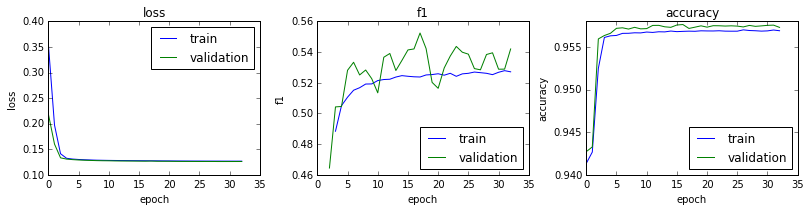

In [65]:
# summarize history for loss
score = "accuracy"
history = trials.train_history(TID)
plt.figure(figsize=(15,3))
for i, score in enumerate(["loss", "f1", "accuracy"]):
    plt.subplot(1,4,i+1)
    plt.tight_layout()
    plt.plot(history[score], label="train")
    plt.plot(history['val_' + score], label="validation")
    plt.title(score)
    plt.ylabel(score)
    plt.xlabel('epoch')
    plt.legend(loc='best')

### Reproduce valid performance

In [12]:
from concise.utils.model_data import split_train_test_idx, subset

In [35]:
from concise.utils.model_data import split_train_test_idx, subset

train_idx, valid_idx = split_train_test_idx(train, valid_split=.2, stratified=False, random_state=100)

valid = subset(train, valid_idx, keep_other=False)
train_train = subset(train, train_idx)

In [36]:
y_pred = m.predict(valid[0])
y_true = valid[1]
print("auprc: ", cem.auprc(y_true, y_pred))
print("auc: ", cem.auc(y_true, y_pred))

auprc:  0.593139963651
auc:  0.914152721571


f1:  0.541264266901


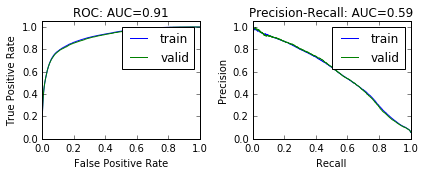

In [37]:
y_true = valid[1]
y_pred = m.predict(valid[0])
y_true_train = train_train[1]
y_pred_train = m.predict(train_train[0])
plt.figure(figsize=(6,2.5))
plt.subplot(121)
plot_roc_curve(y_true_train, y_pred_train, show=False)
plot_roc_curve(y_true, y_pred, show=False)
plt.legend(["train", "valid"])
plt.tight_layout()
plt.subplot(122)
plot_pr_curve(y_true_train, y_pred_train, show=False)

plot_pr_curve(y_true, y_pred, show=False)
plt.legend(["train", "valid"])
plt.tight_layout()
print("f1: ", cem.f1(y_true, y_pred))

### Get test performance

f1:  0.531125978002


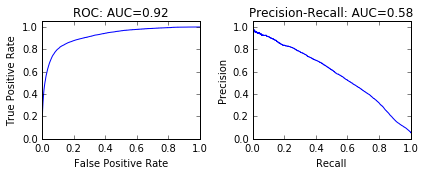

In [38]:
y_true = test[1]
y_pred = m.predict(test[0])
plt.figure(figsize=(6,2.5))
plt.subplot(121)
plot_roc_curve(y_true, y_pred, show=False)
plt.tight_layout()
plt.subplot(122)
plot_pr_curve(y_true, y_pred, show=False)
plt.tight_layout()
print("f1: ", cem.f1(y_true, y_pred))

## Export predictions to csv

In [39]:
dt_pred = pd.DataFrame({"y_true": y_true.reshape((-1,)), "y_pred": y_pred.reshape((-1,))})
dt_pred = dt_pred[dt_pred["y_true"] != -1]
dt_pred["y_true"] = np.where(dt_pred["y_true"]== 1, "HC", "NEG")
dt_pred.sort_values("y_pred")

,y_pred,y_true
88891,0.0000,NEG
88884,0.0000,NEG
88885,0.0000,NEG
...,...,...
162182,0.9665,HC
197260,0.9754,HC
108969,0.9860,HC


In [40]:
dt_pred.to_csv("/s/project/deepcis/Concise/Splice_branchpoints/test_predictions/concise_shallow.csv")

## Model fitting

In [ ]:
m = model.model(**{"train_data": train, **param["model"]})

cur_model = param2str(param)
tb = kc.TensorBoard(log_dir='./logs4/'+ cur_model,
                    histogram_freq=0, 
                    write_graph=False, 
                    write_images=True)
cur_model

In [ ]:
sample_weight = np.squeeze(np.where(train[1]==1, param["data"]["pos_class_weight"], 1), -1)
m.fit(train[0], train[1], epochs=15, 
      batch_size=128,
      sample_weight = sample_weight,
      callbacks=[tb])

## Model interpretation

- **DONE** - download pwm from 
http://katahdin.mssm.edu/splice/splice_matrix.cgi?database=spliceNew

- **TODO** - read - http://www.nature.com.emedien.ub.uni-muenchen.de/nrg/journal/v17/n1/full/nrg.2015.3.html
- splice-site fractions: http://katahdin.mssm.edu/splice/splicesites.html
   - **U12 = 1%, U2 = 99%**

- **DONE** - initialize once only with U2 and then with U12 branchsite
0, 1 or 2 branchsite inizialized (use int as the variable) 

In [120]:
bp_freq = np.array([169, 1602, 469, 183800])

In [121]:
bp_freq

array([   169,   1602,    469, 183800])

In [122]:
bp_freq / bp_freq.sum()

array([ 0.0009,  0.0086,  0.0025,  0.988 ])

In [ ]:
sum(bp_freq[[0,2]]) / bp_freq.sum()

In [ ]:
sum([169, 1602, 469, 183800])

### PWM

filter index: 0


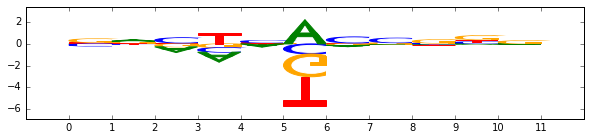

In [57]:
m.layers[10].plotFilters()

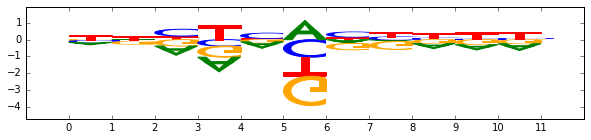

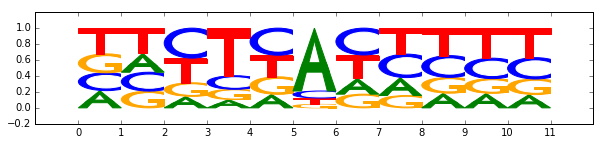

In [58]:
## Aligned positive sequences
pwm_list = train[4]
pwm_list[0].plotPSSM()
pwm_list[0].plotPWM()

The two pssm matrices differ slightly but have the same two strong bases 0:A and -2:T.

### Positional effects

In [62]:
param

{'data': {'n_bases': 20,
  'pos_class_weight': 9.171006099308933,
  'truncate': False},
 'fit': {'batch_size': 128,
  'early_stop_monitor': 'val_loss',
  'epochs': 150,
  'patience': 2},
 'model': {'filters': 1,
  'init_motifs': {'stddev': 0.1, 'use_pssm': True},
  'lr': 0.0034329655705705913,
  'nonlinearity': 'relu',
  'pos_effect': {'l2': 1.071557178101583e-08,
   'l2_smooth': 1.3725606005881432e-07,
   'merge': {'hidden_fc': None, 'type': 'concatenate'},
   'merge_type': 'multiply',
   'n_bases': 20,
   'use_bias': False},
  'use_weightnorm': False}}

In [71]:
position_stats = train[5]
position_stats

{'canon_hit1': {'max': 132.0, 'min': 1.0},
 'canon_hit2': {'max': 196.0, 'min': 3.0},
 'canon_hit3': {'max': 216.0, 'min': 5.0},
 'canon_hit4': {'max': 300.0, 'min': 7.0},
 'canon_hit5': {'max': 300.0, 'min': 10.0},
 'dist1': {'max': 278852.0, 'min': -20.0},
 'dist2': {'max': 44.0, 'min': 18.0},
 'ppt_run_length': {'max': 43.0, 'min': 0.0},
 'ppt_start': {'max': 36.0, 'min': 0.0}}

In [61]:
from concise.utils.splines import BSpline
#def plot_position(weights, x_train):
# start = np.nanmin(x)
# end = np.nanmax(x)
start = 0
end = 1
bs = BSpline(start, end, n_bases=param["data"]["n_bases"])
x_range = np.arange(start, end, (end-start) / 100)
X_pred = bs.predict(x_range)

In [49]:
train[3]

['dist1',
 'dist2',
 'ppt_start',
 'ppt_run_length',
 'canon_hit1',
 'canon_hit2',
 'canon_hit3',
 'canon_hit4',
 'canon_hit5']

- [ ] **TODO** - add the appropriate x, y ranges
- [ ] **TODO** - get the final weight values ( after concat)
- [ ] **TODO** - make the fraction plots in numpy?

In [93]:
w_final = m.layers[-1].get_weights()[0][0,:, 0]

In [96]:
w_final

array([ 1.0761, -1.5576,  1.4698, -0.8619, -0.7967, -1.6362, -1.2261, -0.7655, -0.6297,  0.6946], dtype=float32)

In [105]:
## TODO - add horizontal line at 0

In [106]:
## TODO - plot y on the logit scale?

In [114]:
def sigm(x):
    return 1 / (1 + np.exp(-x))

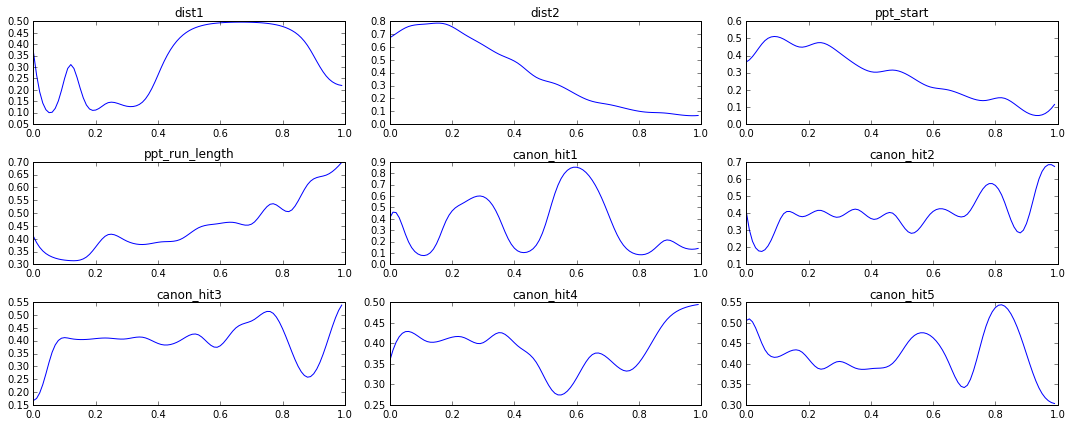

In [118]:
plt.figure(figsize=(15,6))
for i, l  in enumerate(train[3]):
    layer = m.get_layer(l + "_conv")
    w = layer.get_weights()[0].reshape((-1,))
    y_pred = np.dot(X_pred, w) * w_final[i + 1]
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.plot(x_range, sigm(y_pred))
    #plt.plot(x_range, y_pred)
    plt.title(l)

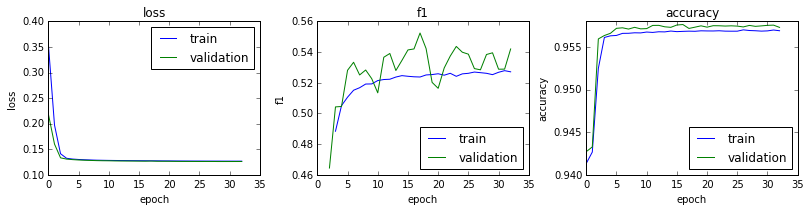

In [65]:
# summarize history for loss
score = "accuracy"
history = trials.train_history(TID)
plt.figure(figsize=(15,3))
for i, score in enumerate(["loss", "f1", "accuracy"]):
    plt.subplot(1,4,i+1)
    plt.tight_layout()
    plt.plot(history[score], label="train")
    plt.plot(history['val_' + score], label="validation")
    plt.title(score)
    plt.ylabel(score)
    plt.xlabel('epoch')
    plt.legend(loc='best')